In [1]:
import pandas as pd #untuk manipulasi data
import numpy as np #untuk manipulasi angka dan operasi math

#untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("E Commerce.xlsx", sheet_name="E Comm") #import dataset

# Data Cleaning

In [3]:
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
#check duplicate data
df.duplicated().sum()

0

data duplicate 0, tidak perlu drop

In [6]:
#check missing value
100*(df.isnull().sum()/len(df))

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

terdapat missing value pada kolom:
1. Tenure, 
2. WarehouseToHome, 
3. HourSpendOnApp, 
4. OrderAmountHikeFromlastYear, 
5. CouponUsed, 
6. OrderCount, dan 
7. DaySinceLastOrder

## Inputasi Missing Value

1. **Tenure** menggunakan inputasi median, karena **tenure(bulan)** jika diisi dengan mean maka akan menghasilkan float64.
2. **WarehouseToHome** menggunakan inputasi median, karena **WarehouseToHome(jarak gudang ke rumah customer)** jika diisi dengan mean maka akan menghasilkan float64, sedangkan data yang sudah ada berjenis int64.
3. **HourSpendOnApp** menggunakan inputasi median, karena **HourSpendOnApp(lama customer menggunakan app dalam jam)** jika diisi dengan mean maka akan menghasilkan float64.
4. **OrderAmountHikeFromlastYear** menggunakan inputasi median, karena **OrderAmountHikeFromlastYear(jumlah pesanan dari tahun lalu)** jika diisi dengan mean maka akan menghasilkan float64.
5. **CouponUsed** menggunakan inputasi median, karena **CouponUsed(pemakaian kupon)** jika diisi dengan mean maka akan menghasilkan float64.
6. **OrderCount** menggunakan inputasi median, karena **OrderCount(jumlah order)** jika diisi dengan mean maka akan menghasilkan float64.
7. **DaySinceLastOrder** menggunakan inputasi median, karena **DaySinceLastOrder(hari sejak orderan terakhir)** jika diisi dengan mean maka akan menghasilkan float64.

In [7]:
#inputasi median menggunakan fungsi 'a.median()'
#melakukan inputasi menggunakan fungsi fillN/A
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median())
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())
df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].median())
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].median())
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())

In [8]:
#check missing value (2)
100*(df.isnull().sum()/len(df))

CustomerID                     0.0
Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

missing value handled by fillna.median()

### handle inconsistent of data

In [9]:
#check inkonsisten data menggunakan looping
for col in df.columns:
    print(f'nilai unik dari {col} :')
    print(f'{df[col].unique()}')
    print('=='*50)

nilai unik dari CustomerID :
[50001 50002 50003 ... 55628 55629 55630]
nilai unik dari Churn :
[1 0]
nilai unik dari Tenure :
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]
nilai unik dari PreferredLoginDevice :
['Mobile Phone' 'Phone' 'Computer']
nilai unik dari CityTier :
[3 1 2]
nilai unik dari WarehouseToHome :
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]
nilai unik dari PreferredPaymentMode :
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
nilai unik dari Gender :
['Female' 'Male']
nilai unik dari HourSpendOnApp :
[3. 2. 1. 0. 4. 5.]
nilai unik dari NumberOfDeviceRegistered :
[3 4 5 2 1 6]
nilai unik dari PreferedOrderCat :
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
nilai unik dari SatisfactionSc

In [10]:
#menghandle inkonsisten data
#menggunakan fungsi replace(nama lama, nama baru)
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone','Mobile Phone')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['CC','Cash on Delivery'], ['Credit Card', 'COD'])
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile','Mobile Phone') 

In [11]:
#check inkonsisten data(2)
for col in df.columns:
    print(f'nilai unik dari {col} :')
    print(f'{df[col].unique()}')
    print('=='*50)

nilai unik dari CustomerID :
[50001 50002 50003 ... 55628 55629 55630]
nilai unik dari Churn :
[1 0]
nilai unik dari Tenure :
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]
nilai unik dari PreferredLoginDevice :
['Mobile Phone' 'Computer']
nilai unik dari CityTier :
[3 1 2]
nilai unik dari WarehouseToHome :
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]
nilai unik dari PreferredPaymentMode :
['Debit Card' 'UPI' 'Credit Card' 'COD' 'E wallet']
nilai unik dari Gender :
['Female' 'Male']
nilai unik dari HourSpendOnApp :
[3. 2. 1. 0. 4. 5.]
nilai unik dari NumberOfDeviceRegistered :
[3 4 5 2 1 6]
nilai unik dari PreferedOrderCat :
['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
nilai unik dari SatisfactionScore :
[2 3 5 4 1]
nilai unik dari Marital

In [12]:
#merubah tipe data
df['Tenure'] = df['Tenure'].astype('int')
df['WarehouseToHome'] = df['WarehouseToHome'].astype('int')
df['HourSpendOnApp'] = df['HourSpendOnApp'].astype('int')
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].astype('int')
df['CouponUsed'] = df['CouponUsed'].astype('int')
df['OrderCount'] = df['OrderCount'].astype('int')
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].astype('int')

# Exploratory Data Analysis

''

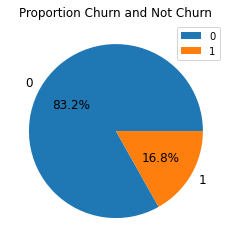

In [13]:
#check perbandingan churn dan tidak churn
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].value_counts().index,
       autopct='%1.1f%%',textprops={'fontsize':12})
        #labels memunculkan Yes/No, autopct memunculkan persentasenya, textprops untuk ukuran text
plt.title('Proportion Churn and Not Churn') #memberi judul
plt.legend() #menampilkan legenda
;

sebanyak 5630 customer, terdapat **83.2% atau 4682 customer memutuskan untuk tidak churn**
dan terdapat **16.8% atau 948 customer memutuskan untuk churn**

In [14]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [15]:
df = df.drop('CustomerID',1)

C:\Users\ilham\AppData\Local\Temp\ipykernel_19404\2354662060.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('CustomerID',1)


In [16]:
num = df.select_dtypes(include=['int', 'float']).columns
obj = df.select_dtypes(include=['object']).columns
num

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [17]:
obj

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

## Univariate Analysis

''

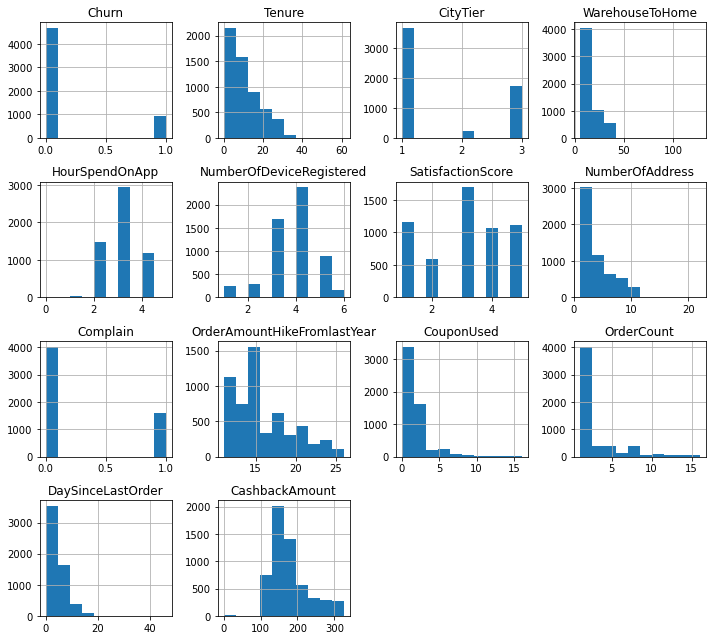

In [18]:
#distribusi data numerik
#atur ukuran gambar menggunakan parameter 'figsize=(a,b)''
df[num].hist(figsize=(10,9))
plt.tight_layout()
;

''

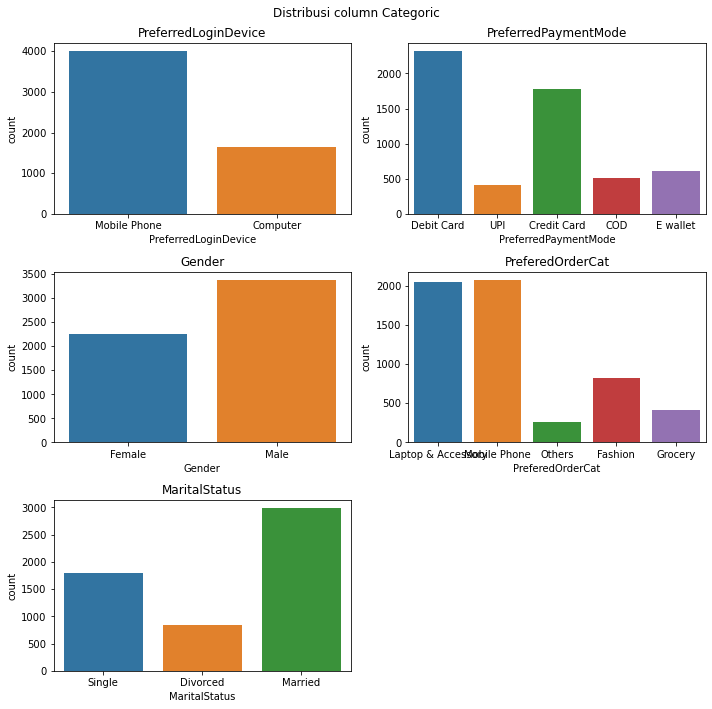

In [19]:
#distribusi categoric metode seaborn
plt.figure(figsize=(10,10)) #mengatur ukuran gambar
plt.suptitle('Distribusi column Categoric') #mengatur judul semua

plt.subplot(3,2,1) #(2,2 adalah bentuk (row,column), 1 adalah indexing gambar)
sns.countplot(data=df, x='PreferredLoginDevice')
plt.title('PreferredLoginDevice') #mengatur judul per histogram

plt.subplot(3,2,2)
sns.countplot(data=df, x='PreferredPaymentMode')
plt.title('PreferredPaymentMode')

plt.subplot(3,2,3)
sns.countplot(data=df, x='Gender')
plt.title('Gender')

plt.subplot(3,2,4)
sns.countplot(data=df, x='PreferedOrderCat')
plt.title('PreferedOrderCat')

plt.subplot(3,2,5)
sns.countplot(data=df, x='MaritalStatus')
plt.title('MaritalStatus')

plt.tight_layout() #untuk memberi jarak
;

## Bivariate Analysis

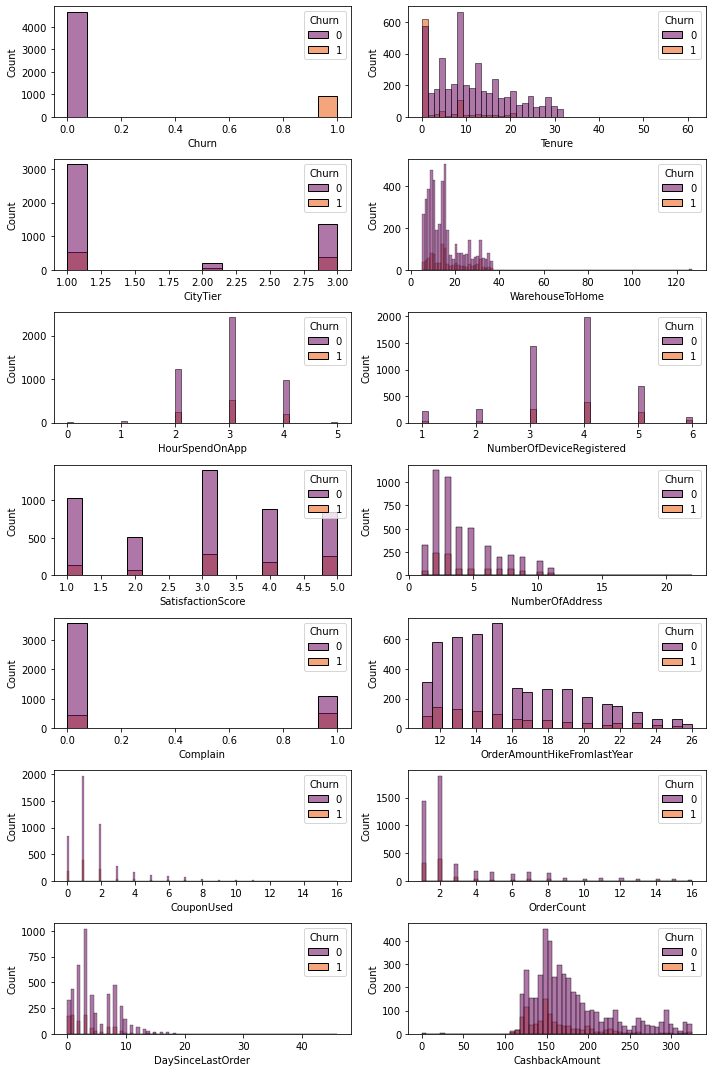

In [20]:
plt.figure(figsize=(10,15))
for x in range(0,len(num)):
    plt.subplot(7,2,x+1)
    sns.histplot(data=df, x=df[num[x]],hue='Churn',palette='inferno',alpha=0.6)
plt.tight_layout()

1. **customer baru** cenderung akan lebih mudah churn dibanding customer lama terlihat dari besarnya churn yang lebih dari 50% di **tabel Tenure**
2. **customer dengan device yang terdaftar lebih banyak**, cenderung lebih mudah churn dilihat dari presentasenya di **tabel NumberOfDeviceRegistered**
3. **customer yang complain** juga cenderung memiliki behavior churn dibandingkan dengan yang tidak complain
4. 

''

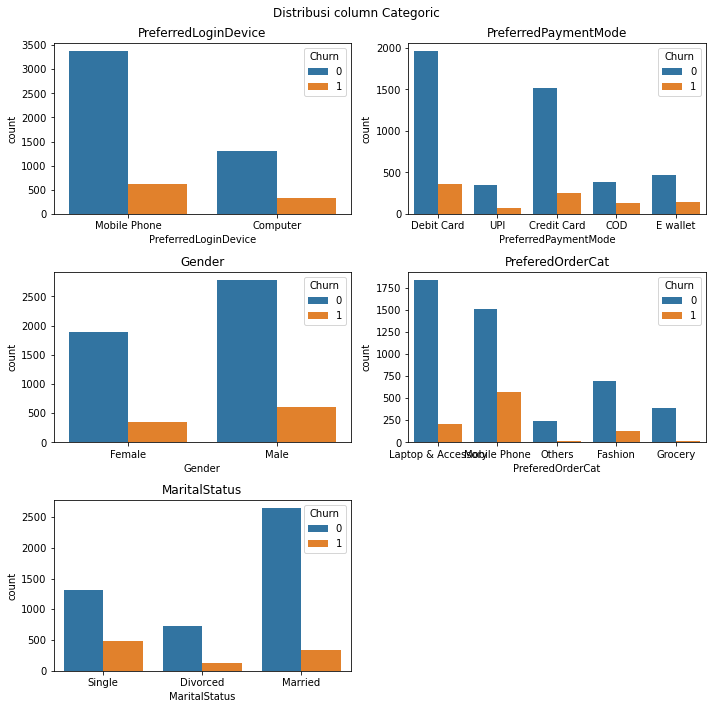

In [21]:
#distribusi categoric metode seaborn
plt.figure(figsize=(10,10)) #mengatur ukuran gambar
plt.suptitle('Distribusi column Categoric') #mengatur judul semua

plt.subplot(3,2,1) #(2,2 adalah bentuk (row,column), 1 adalah indexing gambar)
sns.countplot(data=df, x='PreferredLoginDevice', hue='Churn')
plt.title('PreferredLoginDevice') #mengatur judul per histogram

plt.subplot(3,2,2)
sns.countplot(data=df, x='PreferredPaymentMode', hue='Churn')
plt.title('PreferredPaymentMode')

plt.subplot(3,2,3)
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title('Gender')

plt.subplot(3,2,4)
sns.countplot(data=df, x='PreferedOrderCat', hue='Churn')
plt.title('PreferedOrderCat')

plt.subplot(3,2,5)
sns.countplot(data=df, x='MaritalStatus', hue='Churn')
plt.title('MaritalStatus')

plt.tight_layout() #untuk memberi jarak
;

<AxesSubplot:>

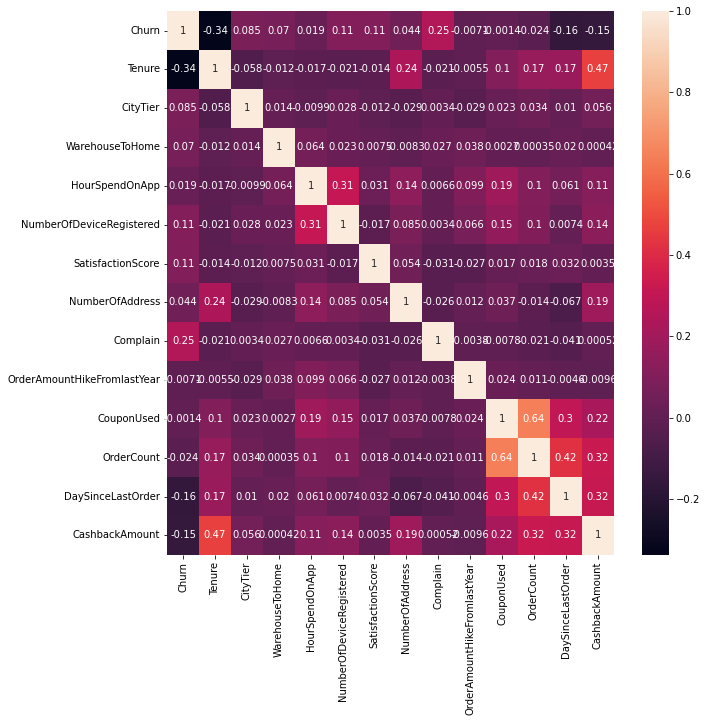

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True) 

In [23]:
num

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [24]:
for x in num:
    print(df.groupby([x]).agg({'Churn':[len,'sum','mean']}))
    print('=='*50)

      Churn          
        len  sum mean
Churn                
0      4682    0  0.0
1       948  948  1.0
       Churn               
         len  sum      mean
Tenure                     
0        508  272  0.535433
1        690  349  0.505797
2        167   14  0.083832
3        195   18  0.092308
4        203   20  0.098522
5        204   16  0.078431
6        183    8  0.043716
7        221   16  0.072398
8        263   16  0.060837
9        511   93  0.181996
10       213   14  0.065728
11       194   10  0.051546
12       182    7  0.038462
13       181   13  0.071823
14       176   14  0.079545
15       159   10  0.062893
16       149   10  0.067114
17       106    4  0.037736
18       123    6  0.048780
19       140   12  0.085714
20       109   16  0.146789
21        84   10  0.119048
22        76    0  0.000000
23        89    0  0.000000
24        75    0  0.000000
25        59    0  0.000000
26        60    0  0.000000
27        66    0  0.000000
28        70    0  0.0

In [25]:
for x in obj:
    print(df.groupby([x]).agg({'Churn':[len,'sum','mean']}))
    print('=='*50)

                     Churn               
                       len  sum      mean
PreferredLoginDevice                     
Computer              1634  324  0.198286
Mobile Phone          3996  624  0.156156
                     Churn               
                       len  sum      mean
PreferredPaymentMode                     
COD                    514  128  0.249027
Credit Card           1774  252  0.142052
Debit Card            2314  356  0.153846
E wallet               614  140  0.228013
UPI                    414   72  0.173913
       Churn               
         len  sum      mean
Gender                     
Female  2246  348  0.154942
Male    3384  600  0.177305
                   Churn               
                     len  sum      mean
PreferedOrderCat                       
Fashion              826  128  0.154964
Grocery              410   20  0.048780
Laptop & Accessory  2050  210  0.102439
Mobile Phone        2080  570  0.274038
Others               264   20  0.0

In [26]:
pd.pivot_table(df,index='SatisfactionScore',columns='PreferedOrderCat',values='Churn',aggfunc='mean')

PreferedOrderCat    Fashion   Grocery  Laptop & Accessory  Mobile Phone  \
SatisfactionScore                                                         
1                  0.154762  0.023810            0.058296      0.186603   
2                  0.209302  0.040000            0.047170      0.194444   
3                  0.098361  0.074074            0.134185      0.274760   
4                  0.136986  0.046512            0.098901      0.278846   
5                  0.219780  0.048780            0.134328      0.400990   

PreferedOrderCat     Others  
SatisfactionScore            
1                  0.041667  
2                  0.090909  
3                  0.042553  
4                  0.129032  
5                  0.105263

In [27]:
pd.pivot_table(df,index='Complain',columns='PreferedOrderCat',values='Churn',aggfunc='mean')

PreferedOrderCat   Fashion   Grocery  Laptop & Accessory  Mobile Phone  \
Complain                                                                 
0                 0.130137  0.028169            0.071046      0.164626   
1                 0.214876  0.095238            0.186380      0.537705   

PreferedOrderCat    Others  
Complain                    
0                 0.040816  
1                 0.176471

In [28]:
df.groupby(['SatisfactionScore']).agg({'Churn':[len,'sum','mean']})

Churn               
                    len  sum      mean
SatisfactionScore                     
1                  1164  134  0.115120
2                   586   74  0.126280
3                  1698  292  0.171967
4                  1074  184  0.171322
5                  1108  264  0.238267

In [29]:
df['SatisfactionScore'].value_counts()

3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64

In [30]:
num

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## Feature Engineering

In [31]:
#0-1, less
#2-3, mid
#4-5, many

HourSpendOnApp_bin = []
for x in df["HourSpendOnApp"]:
    if x < 2 :
        HourSpendOnApp_bin.append("less")
    elif x <4 :
        HourSpendOnApp_bin.append("mid")
    else:
        HourSpendOnApp_bin.append("many")

In [32]:
df['HourSpendOnApp_bin']=HourSpendOnApp_bin

In [33]:
df["HourSpendOnApp_bin"] = df["HourSpendOnApp_bin"].map({'less':0,
                              'mid':1,
                              'many':2})

In [34]:
df.head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1       4         Mobile Phone         3                6   
1      1       9         Mobile Phone         1                8   
2      1       9         Mobile Phone         1               30   
3      1       0         Mobile Phone         3               15   
4      1       0         Mobile Phone         1               12   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female               3                         3   
1                  UPI    Male               3                         4   
2           Debit Card    Male               2                         4   
3           Debit Card    Male               2                         4   
4          Credit Card    Male               3                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1        Mobile Phone                  3        Single                7   
2        Mobile Phone                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4        Mobile Phone                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                           11           1           1   
1         1                           15           0           1   
2         1                           14           0           1   
3         0                           23           0           1   
4         0                           11           1           1   

   DaySinceLastOrder  CashbackAmount  HourSpendOnApp_bin  
0                  5          159.93                   1  
1                  0          120.90                   1  
2                  3          120.28                   1  
3                  3          134.07                   1  
4                  3          129.60                   1

In [35]:
df.groupby('HourSpendOnApp_bin')['Churn'].mean()

HourSpendOnApp_bin
0    0.000000
1    0.169952
2    0.167939
Name: Churn, dtype: float64

<AxesSubplot:xlabel='NumberOfAddress'>

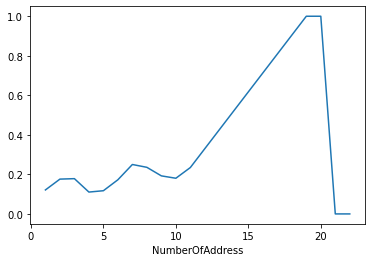

In [36]:
df.groupby('NumberOfAddress')['Churn'].mean().plot()

In [37]:
df.groupby(['NumberOfAddress']).agg({'Churn':[len,'sum','mean']})

Churn               
                  len  sum      mean
NumberOfAddress                     
1                 371   45  0.121294
2                1369  241  0.176041
3                1278  228  0.178404
4                 588   65  0.110544
5                 571   67  0.117338
6                 382   66  0.172775
7                 256   64  0.250000
8                 280   66  0.235714
9                 239   46  0.192469
10                194   35  0.180412
11                 98   23  0.234694
19                  1    1  1.000000
20                  1    1  1.000000
21                  1    0  0.000000
22                  1    0  0.000000

<AxesSubplot:xlabel='NumberOfAddress'>

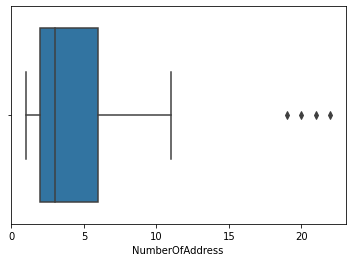

In [38]:
sns.boxplot(data=df,x='NumberOfAddress')

In [39]:
df=df[df['NumberOfAddress']<19]

<AxesSubplot:xlabel='NumberOfAddress'>

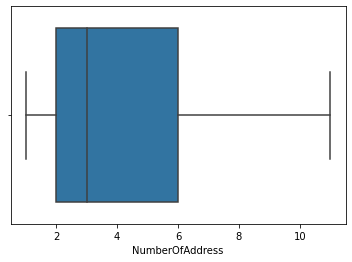

In [40]:
sns.boxplot(data=df,x='NumberOfAddress')

<AxesSubplot:xlabel='NumberOfAddress'>

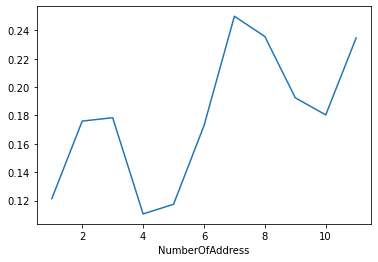

In [41]:
df.groupby('NumberOfAddress')['Churn'].mean().plot()

In [42]:
df.groupby('NumberOfAddress')['Churn'].mean()

NumberOfAddress
1     0.121294
2     0.176041
3     0.178404
4     0.110544
5     0.117338
6     0.172775
7     0.250000
8     0.235714
9     0.192469
10    0.180412
11    0.234694
Name: Churn, dtype: float64

In [43]:
NumberOfAddress_bin = []
for x in df["NumberOfAddress"]:
    if x < 2 :
        NumberOfAddress_bin.append("less")
    elif x < 7:
        NumberOfAddress_bin.append("mid")
    else:
        NumberOfAddress_bin.append("many")

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
df['NumberOfAddress_bin'] = NumberOfAddress_bin

In [46]:
df["NumberOfAddress_bin"] = df["NumberOfAddress_bin"].map({'less':0,
                              'mid':1,
                              'many':2})

In [47]:
df.groupby('NumberOfAddress_bin')['Churn'].mean()

NumberOfAddress_bin
0    0.121294
1    0.159265
2    0.219306
Name: Churn, dtype: float64

<AxesSubplot:xlabel='NumberOfAddress_bin'>

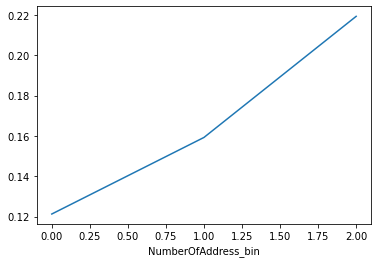

In [48]:
df.groupby('NumberOfAddress_bin')['Churn'].mean().plot()

In [49]:
#buang kolom customerid dan internetservice
df = df.drop(['NumberOfAddress','HourSpendOnApp'],axis=1)
df.head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1       4         Mobile Phone         3                6   
1      1       9         Mobile Phone         1                8   
2      1       9         Mobile Phone         1               30   
3      1       0         Mobile Phone         3               15   
4      1       0         Mobile Phone         1               12   

  PreferredPaymentMode  Gender  NumberOfDeviceRegistered    PreferedOrderCat  \
0           Debit Card  Female                         3  Laptop & Accessory   
1                  UPI    Male                         4        Mobile Phone   
2           Debit Card    Male                         4        Mobile Phone   
3           Debit Card    Male                         4  Laptop & Accessory   
4          Credit Card    Male                         3        Mobile Phone   

   SatisfactionScore MaritalStatus  Complain  OrderAmountHikeFromlastYear  \
0                  2        Single         1                           11   
1                  3        Single         1                           15   
2                  3        Single         1                           14   
3                  5        Single         0                           23   
4                  5        Single         0                           11   

   CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  \
0           1           1                  5          159.93   
1           0           1                  0          120.90   
2           0           1                  3          120.28   
3           0           1                  3          134.07   
4           1           1                  3          129.60   

   HourSpendOnApp_bin  NumberOfAddress_bin  
0                   1                    2  
1                   1                    2  
2                   1                    1  
3                   1                    2  
4                   1                    1

In [50]:
#from feature_engine.encoding import PRatioEncoder

In [51]:
#df['NumberOfAddress_bin'] = df['NumberOfAddress_bin'].astype(str)
#df['HourSpendOnApp_bin'] = df['HourSpendOnApp_bin'].astype(str)

In [52]:
#ratio_enc = PRatioEncoder(
    #encoding_method = 'ratio',
    #variables=['NumberOfAddress_bin','HourSpendOnApp_bin'])

In [53]:
#ratio_enc.fit(df[['NumberOfAddress_bin','HourSpendOnApp_bin']], df.Churn)

In [54]:
#df[['NumberOfAddress_bin','HourSpendOnApp_bin']] = ratio_enc.transform(df[['NumberOfAddress_bin','HourSpendOnApp_bin']])

<AxesSubplot:>

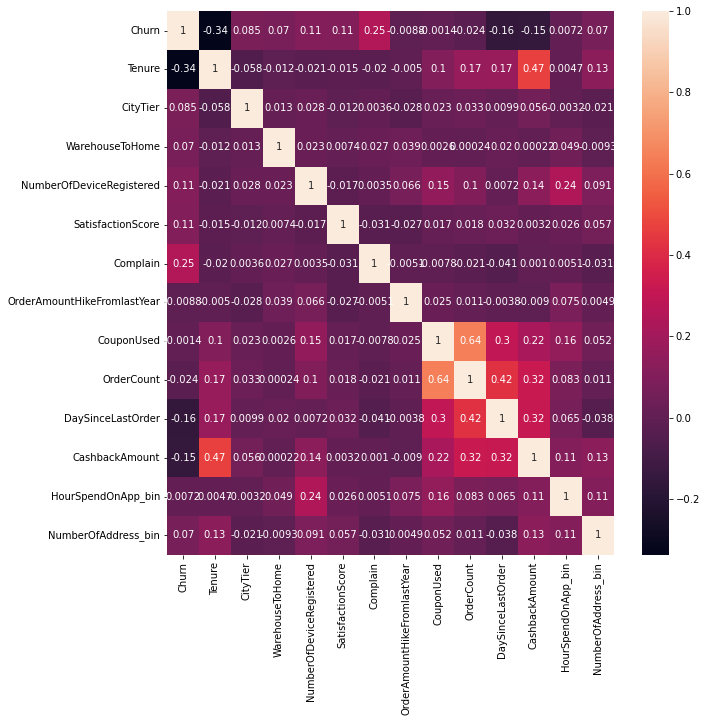

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True) 

In [56]:
#check unik data
for col in df.columns:
    print(f'nilai unik dari {col} :')
    print(f'{df[col].unique()}')
    print('=='*50)

nilai unik dari Churn :
[1 0]
nilai unik dari Tenure :
[ 4  9  0 13 11 19 20 14  8 18  5  2 30  1 23  3 29  6 26 28  7 24 25 10
 15 22 27 16 12 21 17 50 60 31 51 61]
nilai unik dari PreferredLoginDevice :
['Mobile Phone' 'Computer']
nilai unik dari CityTier :
[3 1 2]
nilai unik dari WarehouseToHome :
[  6   8  30  15  12  22  11   9  31  18  13  20  29  28  26  14  10  27
  17  23  33  19  35  24  16  25  32  34   5  21 126   7  36 127]
nilai unik dari PreferredPaymentMode :
['Debit Card' 'UPI' 'Credit Card' 'COD' 'E wallet']
nilai unik dari Gender :
['Female' 'Male']
nilai unik dari NumberOfDeviceRegistered :
[3 4 5 2 1 6]
nilai unik dari PreferedOrderCat :
['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
nilai unik dari SatisfactionScore :
[2 3 5 4 1]
nilai unik dari MaritalStatus :
['Single' 'Divorced' 'Married']
nilai unik dari Complain :
[1 0]
nilai unik dari OrderAmountHikeFromlastYear :
[11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26]
nilai unik dari CouponUse

# Data pre-processing

### Handling Outliers

In [57]:
num = ['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp_bin',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress_bin',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

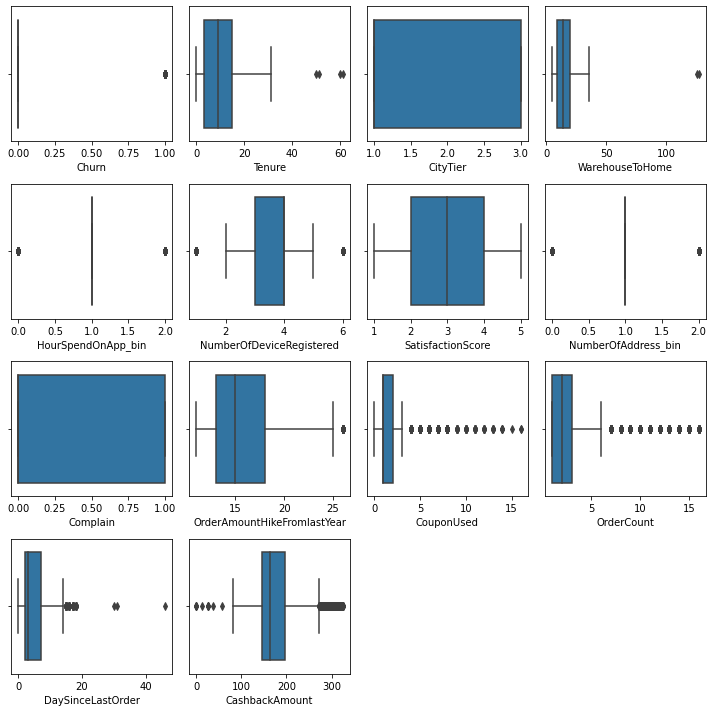

In [58]:
plt.figure(figsize=(10,10))
for x in range(0,len(num)):
    plt.subplot(4,4,x+1)
    sns.boxplot(data=df, x=df[num[x]])
plt.tight_layout()

In [59]:
#Outliers Handling capping methods

def capping_outliers(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.99))
    return(x)

In [60]:
num = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp_bin',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress_bin',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

In [61]:
df[num] = df[num].apply(capping_outliers)

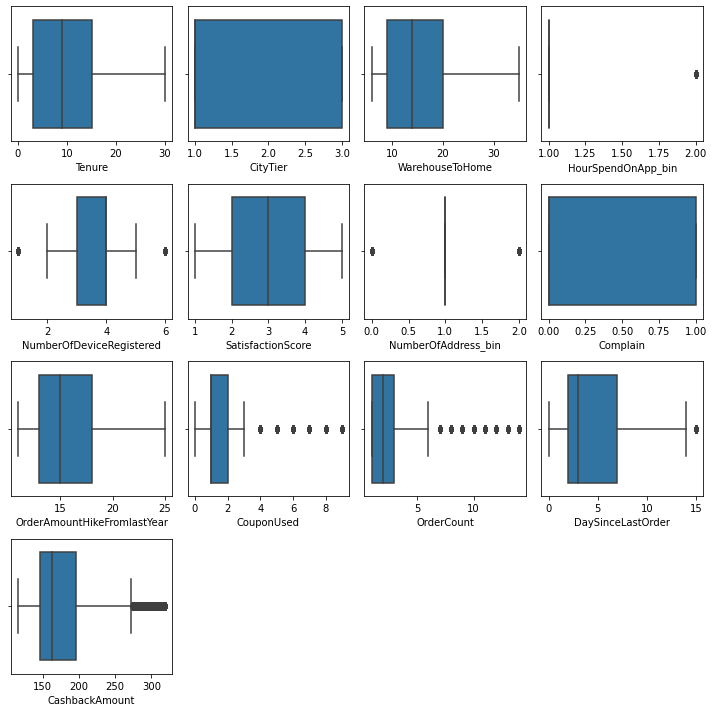

In [62]:
plt.figure(figsize=(10,10))
for x in range(0,len(num)):
    plt.subplot(4,4,x+1)
    sns.boxplot(data=df, x=df[num[x]])
plt.tight_layout()

### Handling Distribution

''

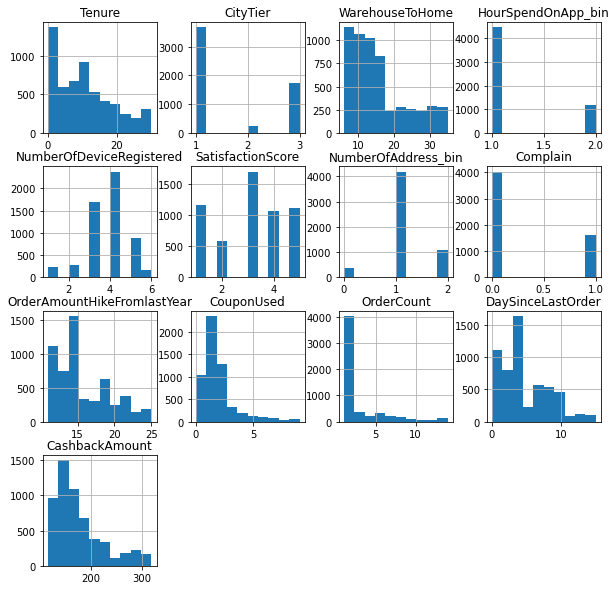

In [63]:
#check distribusi
df[num].hist(figsize=(10,10))
;

In [64]:
dist = ['WarehouseToHome','Tenure','CashbackAmount','OrderAmountHikeFromlastYear']

''

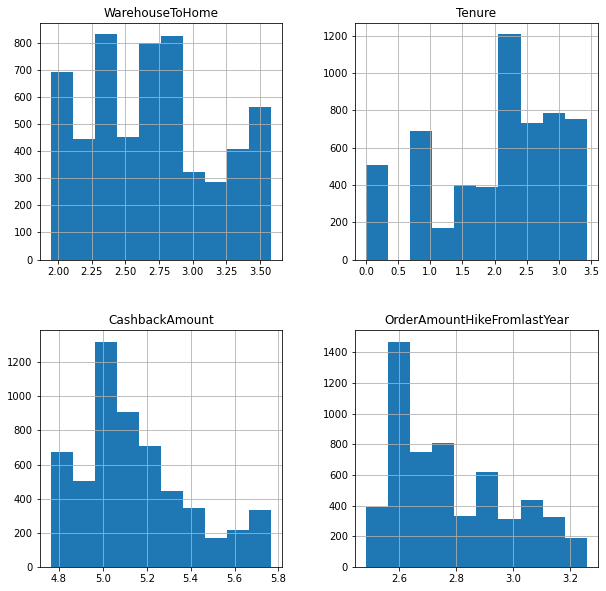

In [65]:
#handling distribution menggunakan METODE LOGARITMA
np.log1p(df[dist]).hist(figsize=(10,10))
;

## Handling Categoric

In [66]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
HourSpendOnApp_bin             float64
NumberOfAddress_bin              int64
dtype: object

In [67]:
#check unik
for x in df.columns:
    print(f'Unik dari colom {x}')
    print(f'{df[x].unique()}')
    print('=='*50)

Unik dari colom Churn
[1 0]
Unik dari colom Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17.]
Unik dari colom PreferredLoginDevice
['Mobile Phone' 'Computer']
Unik dari colom CityTier
[3 1 2]
Unik dari colom WarehouseToHome
[ 6.  8. 30. 15. 12. 22. 11.  9. 31. 18. 13. 20. 29. 28. 26. 14. 10. 27.
 17. 23. 33. 19. 35. 24. 16. 25. 32. 34. 21.  7.]
Unik dari colom PreferredPaymentMode
['Debit Card' 'UPI' 'Credit Card' 'COD' 'E wallet']
Unik dari colom Gender
['Female' 'Male']
Unik dari colom NumberOfDeviceRegistered
[3 4 5 2 1 6]
Unik dari colom PreferedOrderCat
['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Unik dari colom SatisfactionScore
[2 3 5 4 1]
Unik dari colom MaritalStatus
['Single' 'Divorced' 'Married']
Unik dari colom Complain
[1 0]
Unik dari colom OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13. 17. 18. 24. 19. 20. 21. 25.]
Unik dari colom CouponUsed
[1. 0. 4. 2.

In [68]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'HourSpendOnApp_bin', 'NumberOfAddress_bin'],
      dtype='object')

In [69]:
#handling nominal
df["Gender"] = df["Gender"].map({'Male':1,
                              'Female':0})
df["PreferredLoginDevice"] = df["PreferredLoginDevice"].map({'Mobile Phone':1,
                                                          'Computer':0})

In [70]:
df.head()

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     9.0                     1         1              8.0   
2      1     9.0                     1         1             30.0   
3      1     0.0                     1         3             15.0   
4      1     0.0                     1         1             12.0   

  PreferredPaymentMode  Gender  NumberOfDeviceRegistered    PreferedOrderCat  \
0           Debit Card       0                         3  Laptop & Accessory   
1                  UPI       1                         4        Mobile Phone   
2           Debit Card       1                         4        Mobile Phone   
3           Debit Card       1                         4  Laptop & Accessory   
4          Credit Card       1                         3        Mobile Phone   

   SatisfactionScore MaritalStatus  Complain  OrderAmountHikeFromlastYear  \
0                  2        Single         1                         11.0   
1                  3        Single         1                         15.0   
2                  3        Single         1                         14.0   
3                  5        Single         0                         23.0   
4                  5        Single         0                         11.0   

   CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  \
0         1.0         1.0                5.0          159.93   
1         0.0         1.0                0.0          120.90   
2         0.0         1.0                3.0          120.28   
3         0.0         1.0                3.0          134.07   
4         1.0         1.0                3.0          129.60   

   HourSpendOnApp_bin  NumberOfAddress_bin  
0                 1.0                    2  
1                 1.0                    2  
2                 1.0                    1  
3                 1.0                    2  
4                 1.0                    1

In [71]:
#handling PreferredPaymentMode, PreferedOrderCat, MaritalStatus
#gunakan pd.get_dummies

dummies1 = pd.get_dummies(df['PreferredPaymentMode'],prefix="Payment")
dummies2 = pd.get_dummies(df['PreferedOrderCat'],prefix="Category")
dummies3 = pd.get_dummies(df['MaritalStatus'],prefix="Status")

In [72]:
#gabungkan dummies dengan kolom df
#gabungkaan kolom metode concat
df = pd.concat([df,dummies1,dummies2,dummies3],axis=1)

In [73]:
df.head()

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     9.0                     1         1              8.0   
2      1     9.0                     1         1             30.0   
3      1     0.0                     1         3             15.0   
4      1     0.0                     1         1             12.0   

  PreferredPaymentMode  Gender  NumberOfDeviceRegistered    PreferedOrderCat  \
0           Debit Card       0                         3  Laptop & Accessory   
1                  UPI       1                         4        Mobile Phone   
2           Debit Card       1                         4        Mobile Phone   
3           Debit Card       1                         4  Laptop & Accessory   
4          Credit Card       1                         3        Mobile Phone   

   SatisfactionScore  ... Payment_E wallet  Payment_UPI  Category_Fashion  \
0                  2  ...                0            0                 0   
1                  3  ...                0            1                 0   
2                  3  ...                0            0                 0   
3                  5  ...                0            0                 0   
4                  5  ...                0            0                 0   

   Category_Grocery  Category_Laptop & Accessory  Category_Mobile Phone  \
0                 0                            1                      0   
1                 0                            0                      1   
2                 0                            0                      1   
3                 0                            1                      0   
4                 0                            0                      1   

   Category_Others  Status_Divorced  Status_Married  Status_Single  
0                0                0               0              1  
1                0                0               0              1  
2                0                0               0              1  
3                0                0               0              1  
4                0                0               0              1  

[5 rows x 32 columns]

In [74]:
#buang kolom PreferredPaymentMode, PreferedOrderCat, MaritalStatus
df = df.drop(['PreferredPaymentMode','PreferedOrderCat', 'MaritalStatus'],axis=1)
df.head()

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
0      1     4.0                     1         3              6.0       0   
1      1     9.0                     1         1              8.0       1   
2      1     9.0                     1         1             30.0       1   
3      1     0.0                     1         3             15.0       1   
4      1     0.0                     1         1             12.0       1   

   NumberOfDeviceRegistered  SatisfactionScore  Complain  \
0                         3                  2         1   
1                         4                  3         1   
2                         4                  3         1   
3                         4                  5         0   
4                         3                  5         0   

   OrderAmountHikeFromlastYear  ...  Payment_E wallet  Payment_UPI  \
0                         11.0  ...                 0            0   
1                         15.0  ...                 0            1   
2                         14.0  ...                 0            0   
3                         23.0  ...                 0            0   
4                         11.0  ...                 0            0   

   Category_Fashion  Category_Grocery  Category_Laptop & Accessory  \
0                 0                 0                            1   
1                 0                 0                            0   
2                 0                 0                            0   
3                 0                 0                            1   
4                 0                 0                            0   

   Category_Mobile Phone  Category_Others  Status_Divorced  Status_Married  \
0                      0                0                0               0   
1                      1                0                0               0   
2                      1                0                0               0   
3                      0                0                0               0   
4                      1                0                0               0   

   Status_Single  
0              1  
1              1  
2              1  
3              1  
4              1  

[5 rows x 29 columns]

### Scalling

In [75]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'Gender', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'HourSpendOnApp_bin', 'NumberOfAddress_bin', 'Payment_COD',
       'Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet',
       'Payment_UPI', 'Category_Fashion', 'Category_Grocery',
       'Category_Laptop & Accessory', 'Category_Mobile Phone',
       'Category_Others', 'Status_Divorced', 'Status_Married',
       'Status_Single'],
      dtype='object')

In [76]:
#check unik
for x in df.columns:
    print(f'Unik dari colom {x}')
    print(f'{df[x].unique()}')
    print('=='*50)

Unik dari colom Churn
[1 0]
Unik dari colom Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17.]
Unik dari colom PreferredLoginDevice
[1 0]
Unik dari colom CityTier
[3 1 2]
Unik dari colom WarehouseToHome
[ 6.  8. 30. 15. 12. 22. 11.  9. 31. 18. 13. 20. 29. 28. 26. 14. 10. 27.
 17. 23. 33. 19. 35. 24. 16. 25. 32. 34. 21.  7.]
Unik dari colom Gender
[0 1]
Unik dari colom NumberOfDeviceRegistered
[3 4 5 2 1 6]
Unik dari colom SatisfactionScore
[2 3 5 4 1]
Unik dari colom Complain
[1 0]
Unik dari colom OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13. 17. 18. 24. 19. 20. 21. 25.]
Unik dari colom CouponUsed
[1. 0. 4. 2. 9. 6. 7. 5. 3. 8.]
Unik dari colom OrderCount
[ 1.  6.  2. 14.  4.  7.  3.  9. 11.  5. 12. 10.  8. 13.]
Unik dari colom DaySinceLastOrder
[ 5.  0.  3.  7.  2.  1.  8.  6.  4. 15.  9. 11. 10. 13. 12. 14.]
Unik dari colom CashbackAmount
[159.93 120.9  120.28 ... 173.77 287.91 173.78]
U

In [77]:
#scalling
#metode standard scaller
#yang di scalling hanya predictor yang memiliki nilai bukan 0 dan 1
var = ['Tenure', 'CityTier',
       'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'HourSpendOnApp_bin', 'NumberOfAddress_bin']

In [78]:
#library scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [79]:
df[var] = scaler.fit_transform(df[var])
df.head()

Churn    Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
0      1 -0.739000                     1  1.469008        -1.181396       0   
1      1 -0.134080                     1 -0.715670        -0.933423       1   
2      1 -0.134080                     1 -0.715670         1.794275       1   
3      1 -1.222936                     1  1.469008        -0.065519       1   
4      1 -1.222936                     1 -0.715670        -0.437478       1   

   NumberOfDeviceRegistered  SatisfactionScore  Complain  \
0                 -0.672857          -0.772897         1   
1                  0.303541          -0.048419         1   
2                  0.303541          -0.048419         1   
3                  0.303541           1.400538         0   
4                 -0.672857           1.400538         0   

   OrderAmountHikeFromlastYear  ...  Payment_E wallet  Payment_UPI  \
0                    -1.305963  ...                 0            0   
1                    -0.186410  ...                 0            1   
2                    -0.466298  ...                 0            0   
3                     2.052697  ...                 0            0   
4                    -1.305963  ...                 0            0   

   Category_Fashion  Category_Grocery  Category_Laptop & Accessory  \
0                 0                 0                            1   
1                 0                 0                            0   
2                 0                 0                            0   
3                 0                 0                            1   
4                 0                 0                            0   

   Category_Mobile Phone  Category_Others  Status_Divorced  Status_Married  \
0                      0                0                0               0   
1                      1                0                0               0   
2                      1                0                0               0   
3                      0                0                0               0   
4                      1                0                0               0   

   Status_Single  
0              1  
1              1  
2              1  
3              1  
4              1  

[5 rows x 29 columns]

<AxesSubplot:>

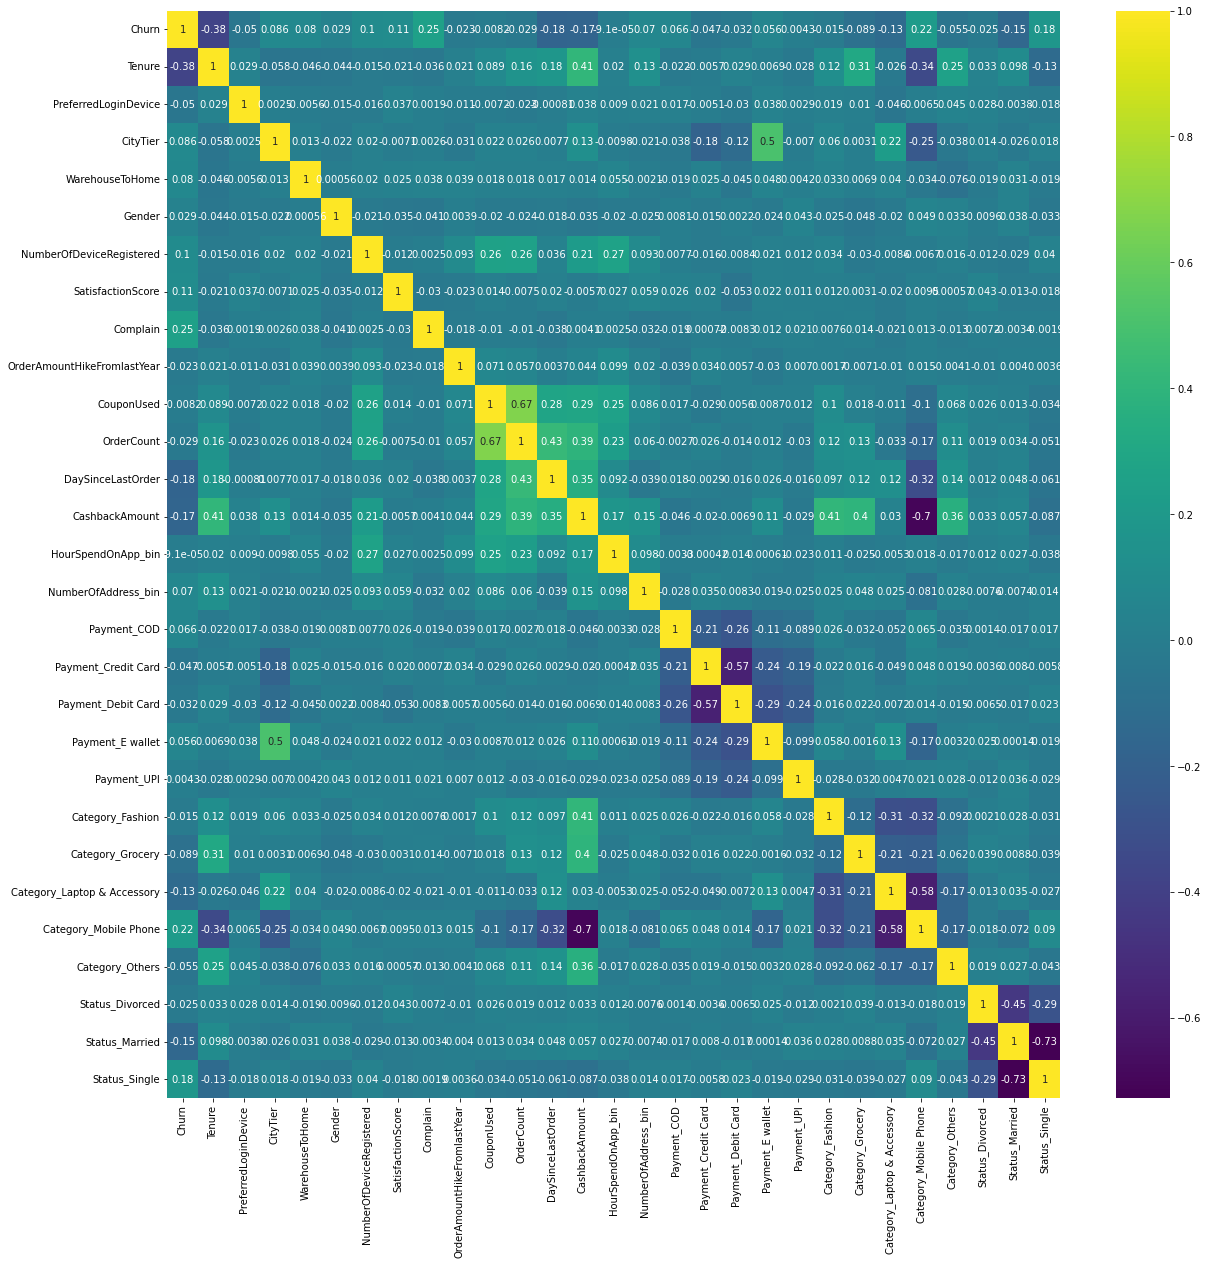

In [80]:
#handling multicolieanrity
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(method='spearman'),annot=True,cmap='viridis',fmt='.2g')

In [81]:
#buang kolom yang memiliki nilai korelasi rendah
#df = df.drop(['PreferredLoginDevice','CityTier',
       #'WarehouseToHome', 'Gender','OrderAmountHikeFromlastYear',
       #'CouponUsed', 'OrderCount','NumberOfAddress_bin', 'Payment_COD',
       #'Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet',
      # 'Payment_UPI', 'Category_Fashion','Category_Others', 'Status_Divorced'],axis=1)
df.head()

Churn    Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
0      1 -0.739000                     1  1.469008        -1.181396       0   
1      1 -0.134080                     1 -0.715670        -0.933423       1   
2      1 -0.134080                     1 -0.715670         1.794275       1   
3      1 -1.222936                     1  1.469008        -0.065519       1   
4      1 -1.222936                     1 -0.715670        -0.437478       1   

   NumberOfDeviceRegistered  SatisfactionScore  Complain  \
0                 -0.672857          -0.772897         1   
1                  0.303541          -0.048419         1   
2                  0.303541          -0.048419         1   
3                  0.303541           1.400538         0   
4                 -0.672857           1.400538         0   

   OrderAmountHikeFromlastYear  ...  Payment_E wallet  Payment_UPI  \
0                    -1.305963  ...                 0            0   
1                    -0.186410  ...                 0            1   
2                    -0.466298  ...                 0            0   
3                     2.052697  ...                 0            0   
4                    -1.305963  ...                 0            0   

   Category_Fashion  Category_Grocery  Category_Laptop & Accessory  \
0                 0                 0                            1   
1                 0                 0                            0   
2                 0                 0                            0   
3                 0                 0                            1   
4                 0                 0                            0   

   Category_Mobile Phone  Category_Others  Status_Divorced  Status_Married  \
0                      0                0                0               0   
1                      1                0                0               0   
2                      1                0                0               0   
3                      0                0                0               0   
4                      1                0                0               0   

   Status_Single  
0              1  
1              1  
2              1  
3              1  
4              1  

[5 rows x 29 columns]

In [82]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'Gender', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'HourSpendOnApp_bin', 'NumberOfAddress_bin', 'Payment_COD',
       'Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet',
       'Payment_UPI', 'Category_Fashion', 'Category_Grocery',
       'Category_Laptop & Accessory', 'Category_Mobile Phone',
       'Category_Others', 'Status_Divorced', 'Status_Married',
       'Status_Single'],
      dtype='object')

# Machine Learning

In [83]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from yellowbrick.classifier import DiscriminationThreshold 
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [84]:
#definisikan variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [85]:
# Separate train and test set for modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test set dimension
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (4500, 28)
Shape of y_train (4500,)
Shape of X_test (1126, 28)
Shape of y_test (1126,)


## Oversampling Using SMOTE
Karena pada target yang kita miliki terdapat imbalanced class, maka kita akan melakukan oversampling menggunakan metode SMOTE. Oversampling hanya dilakukan pada data training.

In [86]:
# Distribution of training target
y_train.value_counts()

0    3735
1     765
Name: Churn, dtype: int64

In [87]:
# oversampling
X_train_over, y_train_over = SMOTE().fit_resample(X_train, y_train)

# distribution target after oversampling
pd.Series(y_train_over).value_counts()

0    3735
1    3735
Name: Churn, dtype: int64

### Choose the best classifier
Pada tahap modelling kita akan membandingkan beberapa metode yang nantinya kita akan pilih mana model yang menghasilkan performa terbaik. Model dengan performa terbaik yang nantinya akan kita pilih dalam tahap selanjutnya.

In [88]:
# Model assignment
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier() 
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
knn = KNeighborsClassifier() 
logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC()
xgb = XGBClassifier(eval_metric='mlogloss')
mlp = MLPClassifier()

# Assign model to a list
models = [dtc, rfc, abc, etc, gbc, bgc, knn, logreg, nb, svm, xgb, mlp]

model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

In [89]:
model_name

['DecisionTreeClassifier',
 'RandomForestClassifier',
 'AdaBoostClassifier',
 'ExtraTreesClassifier',
 'GradientBoostingClassifier',
 'BaggingClassifier',
 'KNeighborsClassifier',
 'LogisticRegression',
 'GaussianNB',
 'SVC',
 'XGBClassifier',
 'MLPClassifier']

### Cross Validation
Pada tahap ini kita lakukan training pada seluruh data menggunakan cross validation.

In [90]:
# Cross validation for each model 
dtc_score = cross_val_score(models[0], X, y, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(models[1], X, y, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
abc_score = cross_val_score(models[2], X, y, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
etc_score = cross_val_score(models[3], X, y, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(models[4], X, y, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_val_score(models[5], X, y, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
knn_score = cross_val_score(models[6], X, y, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(models[7], X, y, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
nb_score = cross_val_score(models[8], X, y, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
svm_score = cross_val_score(models[9], X, y, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[10], X, y, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
mlp_score = cross_val_score(models[11], X, y, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parall

In [91]:
# List of score per model
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

0         1         2         3         4
DecisionTreeClassifier      0.970935  0.969729  0.967135  0.971866  0.951821
RandomForestClassifier      0.999764  0.998519  0.998765  0.999599  0.999613
AdaBoostClassifier          0.911724  0.908733  0.919425  0.922150  0.913360
ExtraTreesClassifier        0.999983  0.999375  0.999483  0.999960  0.999927
GradientBoostingClassifier  0.949331  0.944851  0.940634  0.949303  0.939976
BaggingClassifier           0.997073  0.993194  0.996702  0.995961  0.996665
KNeighborsClassifier        0.961558  0.963633  0.960883  0.965501  0.970563
LogisticRegression          0.889193  0.889177  0.888996  0.898934  0.890709
GaussianNB                  0.808676  0.816138  0.824328  0.820185  0.813973
SVC                         0.936544  0.930228  0.927661  0.938865  0.934744
XGBClassifier               0.999764  0.998655  0.998903  0.999096  0.999808
MLPClassifier               0.991442  0.985925  0.989130  0.990305  0.989752

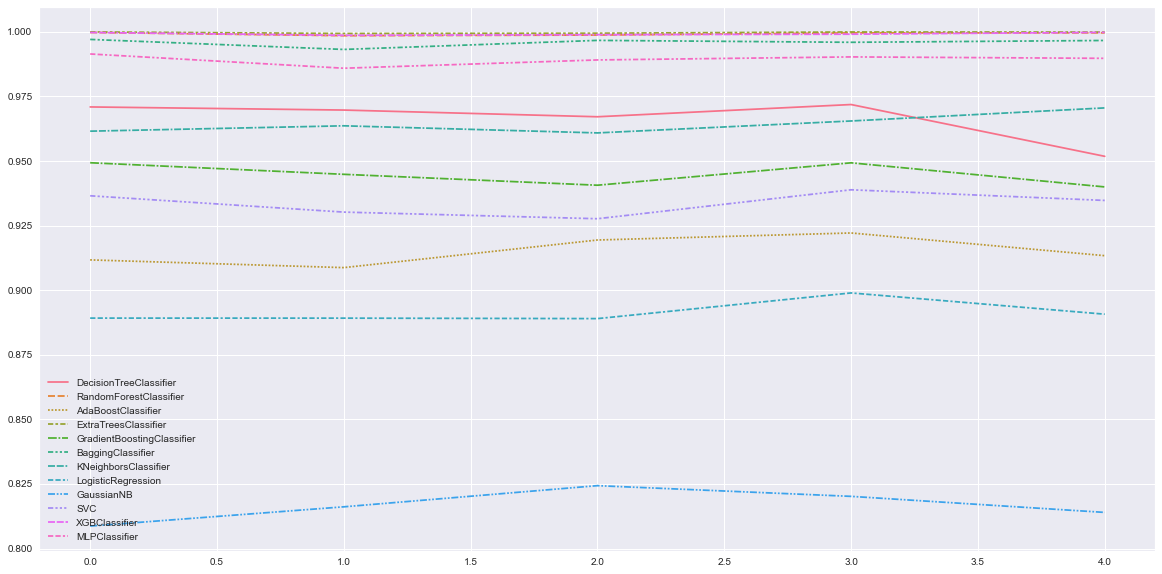

In [92]:
# Plot cross validation score
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.lineplot(data=df_cv_result.T)
plt.show()

In [93]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1

In [94]:
# Calculate standard deviation for every k-fold validation
cv_std = []
i = 0 
for std in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1

In [95]:
# Average and standard deviation score for each model
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std},
                     index=model_name).sort_values(['score_mean', 'score_std'],
                                                   ascending=[False, True])
df_cv

score_mean  score_std
ExtraTreesClassifier          0.999746   0.000261
RandomForestClassifier        0.999252   0.000507
XGBClassifier                 0.999245   0.000463
BaggingClassifier             0.995919   0.001409
MLPClassifier                 0.989311   0.001856
DecisionTreeClassifier        0.966297   0.007410
KNeighborsClassifier          0.964428   0.003471
GradientBoostingClassifier    0.944819   0.004036
SVC                           0.933609   0.004107
AdaBoostClassifier            0.915078   0.004967
LogisticRegression            0.891402   0.003817
GaussianNB                    0.816660   0.005338

Pada eksperimen diatas didapatkan nilai rata-rata akurasi dan standard deviasi nya dari setiap k-fold validation.<br> DecisionTree memiliki performa terbaik dengan rata-rata nilai roc/auc mencapai 99.3% dengan standard deviasi 0.002.

### Fit and Evaluation
Selain dengan menggunakan Cross Validation, saya juga melakukan uji nilai roc_auc-nya pada data training dan testing yang bertujuan untuk melihat akurasi saat data training dan testing dan perbedaaannya. Maka di dapatkan hasil sebagai berikut :

In [96]:
# Create a list to assign a model score
train_score = []
test_score = []

# Create dataframe
df_train_test = pd.DataFrame()
for i in models:
    # Fit each model
    model = i.fit(X_train_over, y_train_over)
    # accuracy for training set
    train_score.append(model.score(X_train_over, y_train_over))
    # accuracy for testing set
    test_score.append(model.score(X_test, y_test))

In [97]:
# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':train_score,
    'test score':test_score},
    index=model_name)

# Create a new column for the difference in accuracy score 
df_avg_score['difference_%'] = abs(100*(df_avg_score['train score'] - df_avg_score['test score']) / df_avg_score['train score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['train score', 'test score','difference_%'], ascending=[False, False, True])
df_avg_score

train score  test score  difference_%
XGBClassifier                  1.000000    0.984014      1.598579
ExtraTreesClassifier           1.000000    0.976021      2.397869
RandomForestClassifier         1.000000    0.974245      2.575488
DecisionTreeClassifier         1.000000    0.925400      7.460036
BaggingClassifier              0.998795    0.954707      4.414144
MLPClassifier                  0.997055    0.968028      2.911221
KNeighborsClassifier           0.964123    0.910302      5.582399
SVC                            0.950335    0.910302      4.212486
GradientBoostingClassifier     0.938688    0.908526      3.213243
AdaBoostClassifier             0.892503    0.888988      0.393923
LogisticRegression             0.857296    0.862345      0.588914
GaussianNB                     0.712851    0.635879     10.797789

Terlihat bahwa GradientBoostingClassifier memiliki perbedaan nilai roc_auc terkecil, hanya selisih sekitar 0.52%. LogisticRegression menjadi model kedua yang memiliki performa terbaik dengan perbedaan sekitar 0.89%,  Gaussian Naive Bayer menjadi model dengan perbedaan terbesar yakni 11.42%.

In [98]:
# Cross validation for each model
dtc_score = cross_validate(models[0], X, y, 
                           scoring=('roc_auc','accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_validate(models[1], X, y, 
                           scoring=('roc_auc', 'accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
abc_score = cross_validate(models[2], X, y, 
                           scoring=('roc_auc', 'accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
etc_score = cross_validate(models[3], X, y, 
                           scoring=('roc_auc', 'accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_validate(models[4], X, y, 
                           scoring=('roc_auc', 'accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_validate(models[5], X, y, 
                           scoring=('roc_auc', 'accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
knn_score = cross_validate(models[6], X, y, 
                           scoring=('roc_auc', 'accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_validate(models[7], X, y, 
                              scoring=('roc_auc', 'accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
nb_score = cross_validate(models[8], X, y, 
                          scoring=('roc_auc', 'accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
svm_score = cross_validate(models[9], X, y, 
                           scoring=('roc_auc', 'accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_validate(models[10], X, y, 
                           scoring=('roc_auc', 'accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
mlp_score = cross_validate(models[11], X, y, 
                           scoring=('roc_auc', 'accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parall

In [99]:
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Average score for each metrics
df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_recall'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result

Model  fit_time  score_time  test_roc_auc  \
0                XGBClassifier  0.410708    0.011205      0.999245   
1         ExtraTreesClassifier  0.232873    0.035895      0.999762   
2       DecisionTreeClassifier  0.016614    0.004416      0.964504   
3       RandomForestClassifier  0.273369    0.031585      0.999319   
4            BaggingClassifier  0.105160    0.008004      0.995893   
5                MLPClassifier  2.154548    0.005774      0.989356   
6                   GaussianNB  0.003792    0.004317      0.816660   
7         KNeighborsClassifier  0.002000    0.256555      0.964428   
8   GradientBoostingClassifier  0.463356    0.007189      0.944815   
9                          SVC  0.204700    0.206553      0.933609   
10          AdaBoostClassifier  0.137809    0.017746      0.915078   
11          LogisticRegression  0.017308    0.003902      0.891402   

    test_accuracy  test_precision  test_recall   test_f1  
0        0.992534        0.980103     0.975667  0.977682  
1        0.991645        0.996697     0.953473  0.974544  
2        0.978848        0.933185     0.942896  0.937481  
3        0.987202        0.989935     0.933383  0.960747  
4        0.979558        0.973775     0.902723  0.936826  
5        0.959119        0.914794     0.836174  0.872965  
6        0.765021        0.393413     0.732565  0.511870  
7        0.931035        0.896508     0.667029  0.764844  
8        0.919302        0.847966     0.635288  0.725816  
9        0.919305        0.910117     0.577215  0.706109  
10       0.891577        0.735477     0.553985  0.631666  
11       0.887844        0.748681     0.501108  0.599436

Dari hasil diatas, DecisionTreeClassifier memiliki nilai recall yang paling tinggi dari keseluruhan model. Pada kasus ini recall menjadi acuan karena kita lebih ingin model kita dapat mengklasifikasi lebih banyak False Positive(FP) daripada False Negative (FN). FP pada kasus ini yaitu model memprediksi customer akan mengalami churn, tetapi sebenarnya tidak churn. Maka FP lebih baik daripada FN. FN yaitu model memprediksi customer tidak akan churn tetapi sebenarnya churn, dan hal ini dapat menyebabkan semakin banyak customer yang tidak bisa kita lakukan penawaran lebih lanjut sehingga mereka churn.<br>
Maka dipilihlah **DecisionTreeClassifier** menjadi model karena memiliki nilai recall paling tinggi

## XGBoostClassifier
#### Feature Selection

In [100]:
# Fit classifier
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train_over, y_train_over)

# predict train set
y_pred_train_def = dtc.predict(X_train_over)

# predict test set
y_pred_test_def = dtc.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((dtc.score(X_train_over, y_train_over) * 100), 2)
test_score_def = round((dtc.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred_test_def)) * 100, 2)
recall_score_train_def = round((recall_score(y_train_over, y_pred_train_def)) * 100, 2)
recall_score_test_def = round((recall_score(y_test, y_pred_test_def)) * 100, 2)
f1_def = round(f1_score(y_test, y_pred_test_def)*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Train : {}%'.format(recall_score_train_def))
print('Recall Test : {}%'.format(recall_score_test_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 100.0%
Test Accuracy : 92.54%
Precision Score : 74.13%
Recall Train : 100.0%
Recall Test : 82.32%
F1 Score : 78.01%


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3735
           1       1.00      1.00      1.00      3735

    accuracy                           1.00      7470
   macro avg       1.00      1.00      1.00      7470
weighted avg       1.00      1.00      1.00      7470



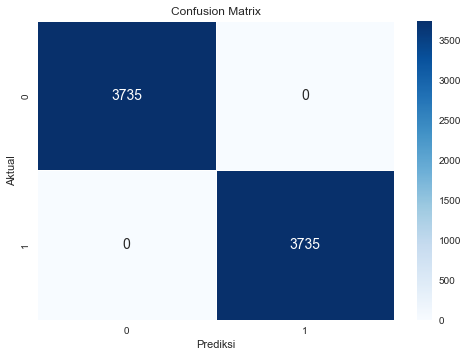

In [101]:
# Confusion Matrix Train
cnf_matrix = confusion_matrix(y_train_over, y_pred_train_def)
print(classification_report(y_train_over, y_pred_train_def))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,linewidth=0.5,fmt='d',annot_kws={"size": 14})
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       945
           1       0.74      0.82      0.78       181

    accuracy                           0.93      1126
   macro avg       0.85      0.88      0.87      1126
weighted avg       0.93      0.93      0.93      1126



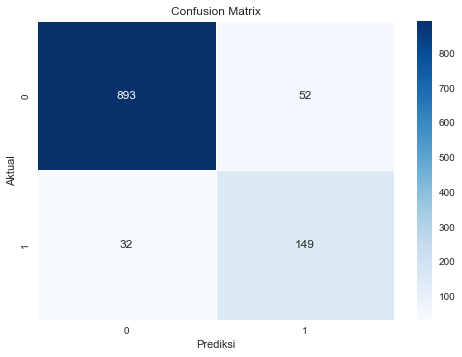

In [102]:
# Confusion Matrix Test
cnf_matrix = confusion_matrix(y_test, y_pred_test_def)
print(classification_report(y_test, y_pred_test_def))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

### RFE for Feature Selection
Pada tahap feature selection ini, kita akan lakukan menggunakan Recursive Feature Elimination. Nantinya akan didapatkan feature yang paling relevan dengan target.     

In [103]:
rfe = RFECV(xgb, cv=5, scoring='roc_auc')
rfe = rfe.fit(X, y)

Optimal number of features : 26


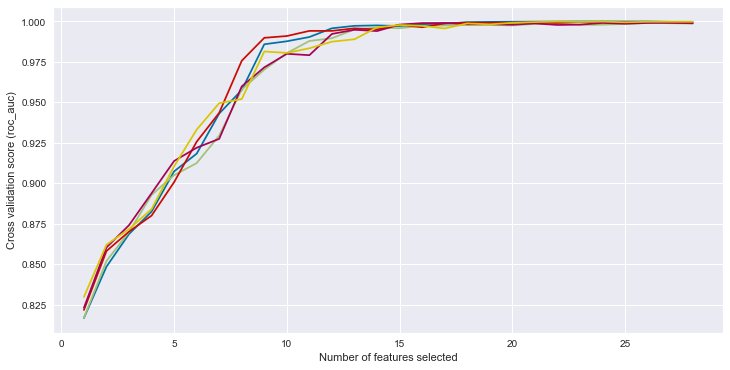

In [104]:
print("Optimal number of features : %d" % rfe.n_features_)

plt.figure(figsize=(12, 6))
plt.plot(
    range(1, len(rfe.grid_scores_) + 1),
    rfe.grid_scores_,
)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (roc_auc)")
plt.show()

In [105]:
pd.DataFrame({'ranking':rfe.ranking_}, index=rfe.feature_names_in_).sort_values('ranking')

ranking
Tenure                             1
Category_Others                    1
Category_Mobile Phone              1
Category_Laptop & Accessory        1
Category_Fashion                   1
Payment_UPI                        1
Payment_E wallet                   1
Payment_Debit Card                 1
Payment_Credit Card                1
Payment_COD                        1
NumberOfAddress_bin                1
Status_Married                     1
HourSpendOnApp_bin                 1
DaySinceLastOrder                  1
OrderCount                         1
CouponUsed                         1
OrderAmountHikeFromlastYear        1
Complain                           1
SatisfactionScore                  1
NumberOfDeviceRegistered           1
Gender                             1
WarehouseToHome                    1
CityTier                           1
PreferredLoginDevice               1
CashbackAmount                     1
Status_Single                      1
Category_Grocery                   2
Status_Divorced                    3

In [106]:
# list of relevant features
relevant_column = list(X.columns[rfe.support_])

# Filtering feature from RFE
df_rfe = df[relevant_column]
# Assign target
df_rfe['Churn'] = y
df_rfe

Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
0    -0.739000                     1  1.469008        -1.181396       0   
1    -0.134080                     1 -0.715670        -0.933423       1   
2    -0.134080                     1 -0.715670         1.794275       1   
3    -1.222936                     1  1.469008        -0.065519       1   
4    -1.222936                     1 -0.715670        -0.437478       1   
...        ...                   ...       ...              ...     ...   
5625 -0.013096                     0 -0.715670         1.794275       1   
5626  0.349856                     1 -0.715670        -0.313492       1   
5627 -1.101952                     1 -0.715670        -0.561464       1   
5628  1.559696                     0  1.469008        -0.809437       1   
5629 -0.255064                     1 -0.715670        -0.065519       1   

      NumberOfDeviceRegistered  SatisfactionScore  Complain  \
0                    -0.672857          -0.772897         1   
1                     0.303541          -0.048419         1   
2                     0.303541          -0.048419         1   
3                     0.303541           1.400538         0   
4                    -0.672857           1.400538         0   
...                        ...                ...       ...   
5625                 -1.649256          -1.497375         0   
5626                  1.279939           1.400538         0   
5627                 -1.649256           0.676059         1   
5628                  1.279939           0.676059         0   
5629                 -1.649256          -0.048419         0   

      OrderAmountHikeFromlastYear  CouponUsed  ...  Payment_Debit Card  \
0                       -1.305963   -0.400074  ...                   1   
1                       -0.186410   -0.978392  ...                   0   
2                       -0.466298   -0.978392  ...                   1   
3                        2.052697   -0.978392  ...                   1   
4                       -1.305963   -0.400074  ...                   0   
...                           ...         ...  ...                 ...   
5625                     0.653255   -0.400074  ...                   0   
5626                     0.093479   -0.400074  ...                   0   
5627                     1.492921   -0.400074  ...                   1   
5628                    -0.186410    0.178244  ...                   0   
5629                    -0.746187    0.178244  ...                   0   

      Payment_E wallet  Payment_UPI  Category_Fashion  \
0                    0            0                 0   
1                    0            1                 0   
2                    0            0                 0   
3                    0            0                 0   
4                    0            0                 0   
...                ...          ...               ...   
5625                 0            0                 0   
5626                 0            0                 1   
5627                 0            0                 0   
5628                 0            0                 0   
5629                 0            0                 0   

      Category_Laptop & Accessory  Category_Mobile Phone  Category_Others  \
0                               1                      0                0   
1                               0                      1                0   
2                               0                      1                0   
3                               1                      0                0   
4                               0                      1                0   
...                           ...                    ...              ...   
5625                            1                      0                0   
5626                            0                      0                0   
5627                            1                      0                0   
5628  

Dari hasil RFE diatas didapatkan sebanyak 11 feature yang paling relevan dalam memprediksi target.
Selanjutnya lakukan training data dari hasil RFE.

In [107]:
# Separate features and target
X = df_rfe.drop('Churn', axis=1)
y = df_rfe['Churn']

# Separate train and test set for modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test set dimension
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (4500, 26)
Shape of y_train (4500,)
Shape of X_test (1126, 26)
Shape of y_test (1126,)


In [108]:
# Oversampling using SMOTE method
X_train_over, y_train_over = SMOTE().fit_resample(X_train, y_train)

pd.Series(y_train_over).value_counts()

0    3735
1    3735
Name: Churn, dtype: int64

In [109]:
xgb_rfe = XGBClassifier(eval_metric='mlogloss')
# Fit classifier
xgb_rfe.fit(X_train_over, y_train_over)

# Predict test set
y_pred_rfe = xgb_rfe.predict(X_test)
y_train_pred_rfe = xgb_rfe.predict(X_train_over)

#Calculate accuracy, precision, recall, and f1-score
train_score_rfe = round((xgb_rfe.score(X_train_over, y_train_over) * 100), 2)
test_score_rfe = round((xgb_rfe.score(X_test, y_test) * 100), 2)
prec_score_rfe = round((precision_score(y_test, y_pred_rfe)) * 100, 2)
recall_score_train_rfe = round((recall_score(y_train_over, y_train_pred_rfe)) * 100, 2)
recall_score_test_rfe = round((recall_score(y_test, y_pred_rfe)) * 100, 2)
f1_rfe = round(f1_score(y_test, y_pred_rfe)*100, 2)

print('Training Accuracy : {}%'.format(train_score_rfe))
print('Test Accuracy : {}%'.format(test_score_rfe))
print('Precision Score : {}%'.format(prec_score_rfe))
print('Recall Score Train : {}%'.format(recall_score_train_rfe))
print('Recall Score Test : {}%'.format(recall_score_test_rfe))
print('F1 Score : {}%'.format(f1_rfe))

Training Accuracy : 100.0%
Test Accuracy : 98.58%
Precision Score : 97.69%
Recall Score Train : 100.0%
Recall Score Test : 93.37%
F1 Score : 95.48%


In [110]:
pd.DataFrame({
    'train_acc':[train_score_def, train_score_rfe],
    'test_acc':[test_score_def, test_score_rfe],
    'precision':[prec_score_def, prec_score_rfe],
    'recall_train':[recall_score_train_def, recall_score_train_rfe],
    'recall_test' : [recall_score_test_def, recall_score_test_rfe],
    'f1-score':[f1_def, f1_rfe]}, index=['without_rfe', 'with_rfe'])

train_acc  test_acc  precision  recall_train  recall_test  \
without_rfe      100.0     92.54      74.13         100.0        82.32   
with_rfe         100.0     98.58      97.69         100.0        93.37   

             f1-score  
without_rfe     78.01  
with_rfe        95.48

### Hyper Parameter Tuning

In [111]:
xgb_param_grid = {'n_estimators': np.linspace(100, 1000, 10, dtype=int),
                 'learning_rate': np.arange(0.05, 0.31, 0.05),
                 'max_depth': np.arange(3, 11, 1, dtype=int),
                 'min_child_weight': np.arange(1, 8, 1, dtype=int),
                 'colsample_bytree': np.linspace(0.3, 1, 7)}

In [112]:
xgb_rs =  RandomizedSearchCV(xgb, xgb_param_grid, scoring='roc_auc', 
                            cv=5, n_jobs=-1, verbose=1, 
                            n_iter=200, random_state=42)

In [113]:
%time

xgb_rs.fit(X_train_over, y_train_over)

print(f'Best parameters: {xgb_rs.best_params_}') 
print(f'Recall (Training set): {xgb_rs.best_score_:.4f}') 
print(f'Recall (Test set): {recall_score(y_test, xgb_rs.predict(X_test)):.4f}')

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters: {'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.41666666666666663}
Recall (Training set): 0.9955
Recall (Test set): 0.9448


In [114]:
# Predict test set
y_pred_rs = xgb_rs.predict(X_test)
y_train_pred_rs = xgb_rs.predict(X_train_over)

#Calculate accuracy, precision, recall, and f1-score
train_score_rs = round((xgb_rs.score(X_train_over, y_train_over) * 100), 2)
test_score_rs = round((xgb_rs.score(X_test, y_test) * 100), 2)
prec_score_rs = round((precision_score(y_test, y_pred_rs)) * 100, 2)
recall_score_train_rs = round((recall_score(y_train_over, y_train_pred_rs)) * 100, 2)
recall_score_test_rs = round((recall_score(y_test, y_pred_rs)) * 100, 2)
f1_rs = round(f1_score(y_test, y_pred_rs)*100, 2)

print('Training Accuracy : {}%'.format(train_score_rs))
print('Test Accuracy : {}%'.format(test_score_rs))
print('Precision Score : {}%'.format(prec_score_rs))
print('Recall Score Train : {}%'.format(recall_score_train_rs))
print('Recall Score Test : {}%'.format(recall_score_test_rs))
print('F1 Score : {}%'.format(f1_rs))

Training Accuracy : 100.0%
Test Accuracy : 99.83%
Precision Score : 99.42%
Recall Score Train : 100.0%
Recall Score Test : 94.48%
F1 Score : 96.88%


In [115]:
import dalex as dx

In [116]:
## initiate explainer for ridge regression model
reg_explain = dx.Explainer(xgb_rs, X_train_over, y_train_over, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 7470 rows 26 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7470 values
  -> model_class       : sklearn.model_selection._search.RandomizedSearchCV (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x0000022293974C10> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.97e-05, mean = 0.5, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.215, mean = -5.7e-05, max = 0.28
  -> model_info        : package sklearn

A new explainer has been created!


In [117]:
reg_explain.model_parts().plot()

In [118]:
# create partial dependence plot of XGB Classifier
reg_explain.model_profile().plot()

Calculating ceteris paribus: 100%|█████████████████████████████████████████████████████| 26/26 [00:00<00:00, 29.83it/s]


## Model Evaluation
Lakukan evaluasi terhadap model, seperti melihat confusion matrix, classification report dan feature importance hasil  training.

## Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3735
           1       1.00      1.00      1.00      3735

    accuracy                           1.00      7470
   macro avg       1.00      1.00      1.00      7470
weighted avg       1.00      1.00      1.00      7470



Text(52.0, 0.5, 'Aktual')

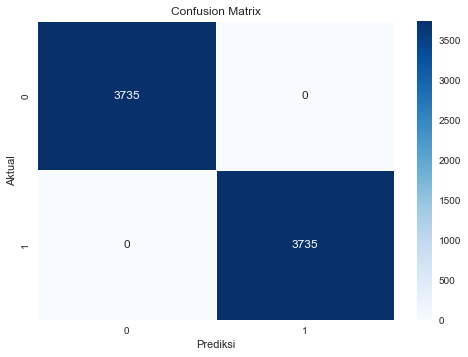

In [119]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_train_over, y_train_pred_rs)
print(classification_report(y_train_over, y_train_pred_rs))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       945
           1       0.99      0.94      0.97       181

    accuracy                           0.99      1126
   macro avg       0.99      0.97      0.98      1126
weighted avg       0.99      0.99      0.99      1126



Text(52.0, 0.5, 'Aktual')

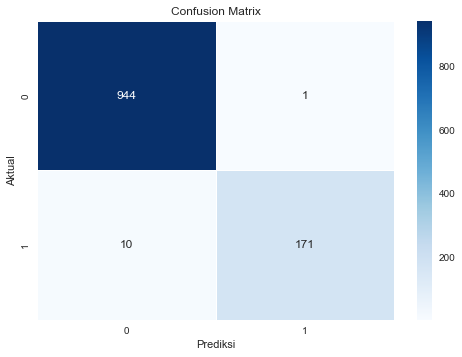

In [120]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred_rs)
print(classification_report(y_test, y_pred_rs))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

### ROC_AUC graph

In [121]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve, plot_pr_curve

Text(0.5, 0, 'False Positive Rate')

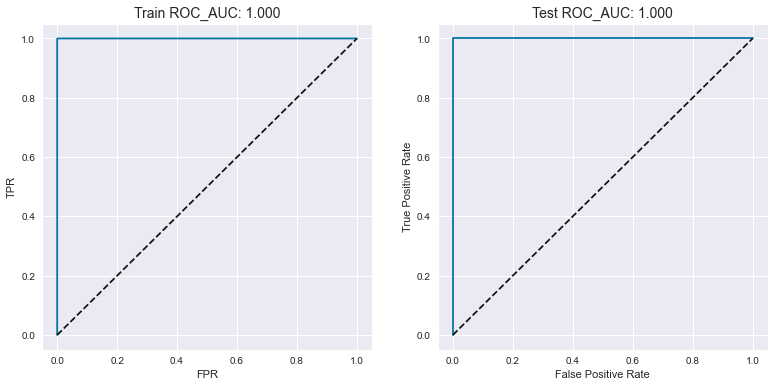

In [122]:
plot_roc_curve(X_train_over, y_train_pred_rs, X_test, y_pred_rs, xgb_rs)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [123]:
# Precision Recall Curve
y_pred_rs = xgb_rs.predict_proba(X_test)[:,1]
prec, recall, _ = precision_recall_curve(y_test, y_pred_rs, pos_label=xgb_rs.classes_[1])
pr_display = PrecisionRecallDisplay(prec, recall)

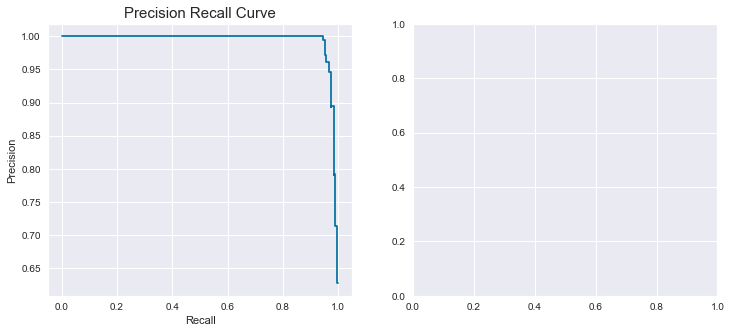

In [124]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

pr_display.plot(ax=ax1)
ax1.set_title('Precision Recall Curve', fontsize=15 )
plt.show()

Text(0.5, 0, 'Probability Prediction')

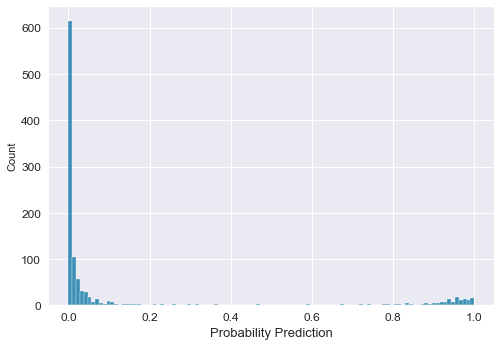

In [131]:
sns.histplot(xgb_rs.predict_proba(X_test)[:,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Probability Prediction', fontsize=13)